**Jack Freeman**

Spring 2021

CS 251: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [227]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import pca_cov

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [228]:
iris_filename = 'data/iris.csv'
iris_data = pd.read_csv(iris_filename)
print(iris_data.head(5))
pca = pca_cov.PCA_COV(iris_data)

   sepalLength  sepalWidth  petalLength  petalWidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [229]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [230]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [231]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [232]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)



# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.

In [233]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize = True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

# pca.pca_then_project_back(2)

Normalize
(150, 4)
There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.0695  0.00399 0.00129 0.00039]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.9246187232017272, 0.977685206318795, 0.9947878161267247, 1.0]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.

#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

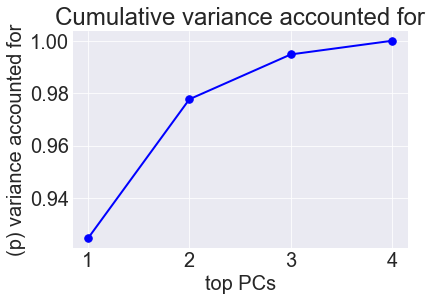

In [234]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Question 1 answer:** I would drop two PCs because keeping two PCs accounts for greater than 95% of the variance which means there is no need for the other two. 

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [235]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

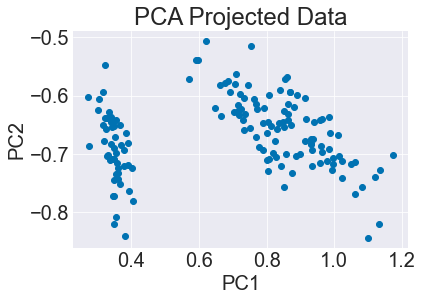

In [236]:
plt.scatter(iris_proj[:,0],iris_proj[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projected Data")
plt.show()

### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

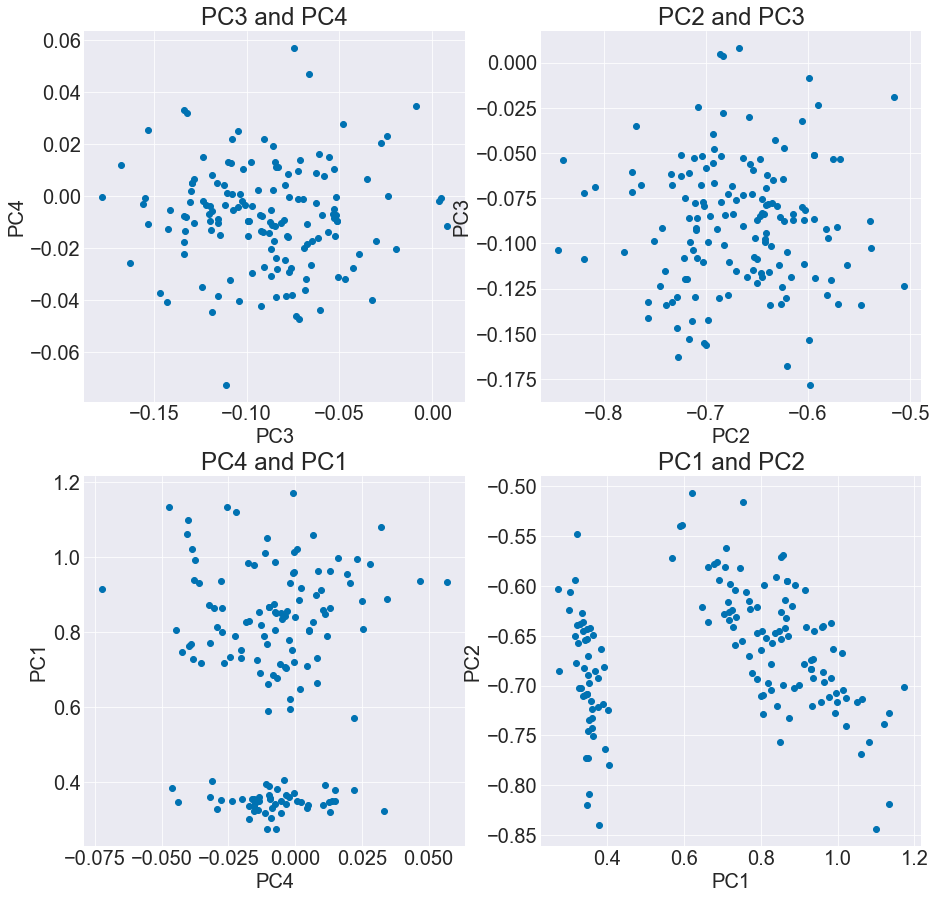

In [237]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].scatter(pca.pca_project([2,3])[:,0],pca.pca_project([2,3])[:,1])
axs[0,0].set(xlabel='PC3',ylabel='PC4',title="PC3 and PC4")
axs[0,1].scatter(pca.pca_project([1,2])[:,0],pca.pca_project([1,2])[:,1])
axs[0,1].set(xlabel='PC2',ylabel='PC3',title="PC2 and PC3")
axs[1,0].scatter(pca.pca_project([3,0])[:,0],pca.pca_project([3,0])[:,1])
axs[1,0].set(xlabel='PC4',ylabel='PC1',title="PC4 and PC1")
axs[1,1].scatter(pca.pca_project([0,1])[:,0],pca.pca_project([0,1])[:,1])
axs[1,1].set(xlabel='PC1',ylabel='PC2',title="PC1 and PC2")
plt.show()

**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Question 2 answer:** Based upon the output, PC1 is the most valuable to retain becasue it clearly posesses a signficant trend and adds variance. The top two grids show that PC3 is negiligible becasue of the x and y scales.

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

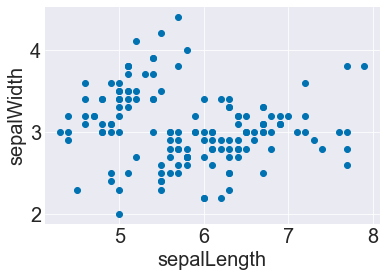

In [238]:
# Plot original iris data
plt.scatter(iris_data.loc[:,'sepalLength'],iris_data.loc[:,'sepalWidth'])
plt.xlabel('sepalLength')
plt.ylabel('sepalWidth')
plt.show()


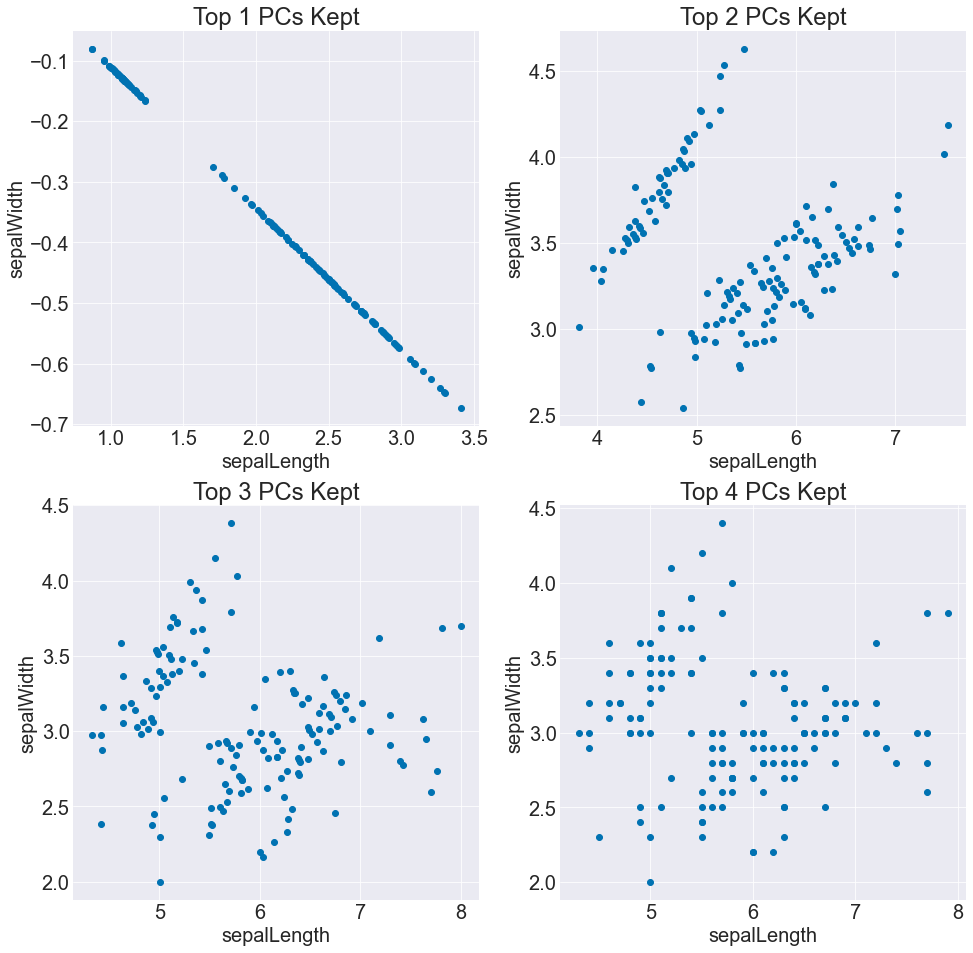

In [239]:
# 2x2 grid of scatter plots
fig, axs = plt.subplots(2,2,figsize=(16,16))
count = 1
for i in range(2):
    for j in range(2):
        A_r = pca.pca_then_project_back(count)
        axs[i,j].scatter(A_r[:,0],A_r[:,1])
        axs[i,j].set(xlabel="sepalLength",ylabel="sepalWidth",title=f'Top {count} PCs Kept')
        count += 1
plt.show()


**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Question 3 answer:** I am unable to answer this question becasue I couldn't sucessfully create an if else statement to deal with the whether the data is normailized. 

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [240]:
face_imgs = np.load('data/lfwcrop.npy')
face_names = np.loadtxt('data/lfwcrop_ids.txt', dtype=str, delimiter='\t')

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

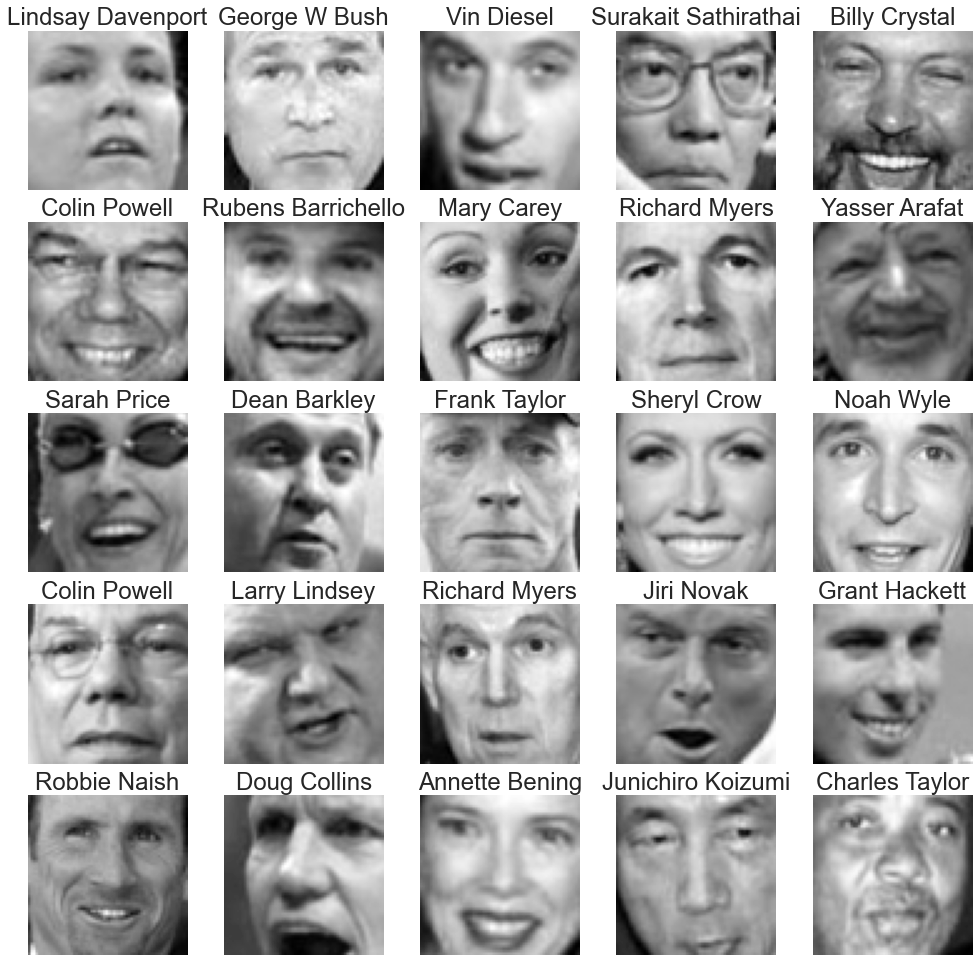

In [241]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid 
    of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, axs = plt.subplots(5,5,figsize=(17,17))
    
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i,j].imshow(face_imgs[cnt],cmap=plt.get_cmap('gray'))
            axs[i,j].set(title=face_names[cnt])
            axs[i,j].axis('off')
            cnt += 1
    
face_plot(face_imgs,face_names)


### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

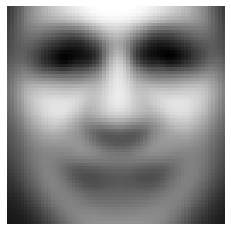

In [242]:
faces_r = np.reshape(face_imgs,(face_imgs.shape[0],face_imgs.shape[1]*face_imgs.shape[2]))
mean_face_r = np.mean(faces_r,0)
mean_face = np.reshape(mean_face_r,(face_imgs.shape[1],face_imgs.shape[2]))

plt.imshow(mean_face,cmap='gray')
plt.axis('off')
plt.show()

**Question 4:** What does the "mean face" image represent?

**Question 4 answer:** Since a face is comprised of pixels, a mean face is the mean value of every pixel compiled into the general structure of a face. You can see the areas where shadows are expected in a human face (ridge of the nose, eyes, mouth).

### 4d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [243]:
# Your reshape code here
face_imgs_vec = np.reshape(face_imgs,(face_imgs.shape[0],face_imgs.shape[1]*face_imgs.shape[2]))


print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')

Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [244]:
import time

faces_df = pd.DataFrame(face_imgs_vec)
pca_faces = pca_cov.PCA_COV(faces_df)
start = time.time()
pca_faces.pca(list(np.arange(4096)))
end = time.time()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.

In [245]:
print(f'Time Elapsed: {end-start} Seconds')

Time Elapsed: 62.93825888633728 Seconds


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

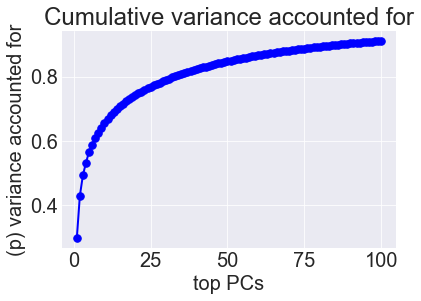

In [246]:
pca_faces.elbow_plot(100)

### 2g) Morgridge AT&T Face Project

First a dictionary named faces will be populated with the 400 faces read from the zipped file 'attface'. We will extract each file into a byte string with the image.read() method and then OpenCV imdecode() method will convert the string into a np array.


In [247]:
import cv2
import zipfile

faces = {}
with zipfile.ZipFile("data/attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue 
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

#### Lets confirm shape
Shape represents pixel size of each picture 

In [248]:
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

Face image shape: (112, 92)


#### And confirm everything has loaded properly

In [249]:
print(list(faces.keys())[:5])


['attface/s34/7.pgm', '__MACOSX/attface/s34/._7.pgm', 'attface/s34/6.pgm', '__MACOSX/attface/s34/._6.pgm', 'attface/s34/4.pgm']


**HMM They duplicated **
Created a for loop to pop the duplicates from the dictionary - with more time I would look into the image read method to identify the code redundency

In [250]:
for i in faces.copy():
    if 'MAC' in i:
        faces.pop(i)
    else: 
        continue

** Printing to confirm**

In [251]:
print(list(faces))

['attface/s34/7.pgm', 'attface/s34/6.pgm', 'attface/s34/4.pgm', 'attface/s34/5.pgm', 'attface/s34/1.pgm', 'attface/s34/2.pgm', 'attface/s34/3.pgm', 'attface/s34/8.pgm', 'attface/s34/9.pgm', 'attface/s34/10.pgm', 'attface/s33/7.pgm', 'attface/s33/6.pgm', 'attface/s33/4.pgm', 'attface/s33/5.pgm', 'attface/s33/1.pgm', 'attface/s33/2.pgm', 'attface/s33/3.pgm', 'attface/s33/8.pgm', 'attface/s33/9.pgm', 'attface/s33/10.pgm', 'attface/s5/7.pgm', 'attface/s5/6.pgm', 'attface/s5/4.pgm', 'attface/s5/5.pgm', 'attface/s5/1.pgm', 'attface/s5/2.pgm', 'attface/s5/3.pgm', 'attface/s5/8.pgm', 'attface/s5/9.pgm', 'attface/s5/10.pgm', 'attface/s2/7.pgm', 'attface/s2/6.pgm', 'attface/s2/4.pgm', 'attface/s2/5.pgm', 'attface/s2/1.pgm', 'attface/s2/2.pgm', 'attface/s2/3.pgm', 'attface/s2/8.pgm', 'attface/s2/9.pgm', 'attface/s2/10.pgm', 'attface/s32/7.pgm', 'attface/s32/6.pgm', 'attface/s32/4.pgm', 'attface/s32/5.pgm', 'attface/s32/1.pgm', 'attface/s32/2.pgm', 'attface/s32/3.pgm', 'attface/s32/8.pgm', 'attfac

## Now lets confirm again

In [252]:
print("Number of pictures:", len(faces))

Number of pictures: 400


*** Vectorizing the pictures and converting them into 2D numpy array ***

In [253]:
facematrix = []
for key,val in faces.items():
    facematrix.append(val.flatten())
 
# Create facematrix as (n_samples,n_pixels) matrix
facematrix = np.array(facematrix)

*** Wanted to demonstrate comprehension of different PCA implementations like this one from scikit-learn.
I printed the explained varaince from each principal component  ***

In [254]:
from sklearn.decomposition import PCA
 
pca = PCA().fit(facematrix)
print(pca.explained_variance_ratio_)

[0.1761  0.12907 0.06841 0.05579 0.0511  0.03363 0.02447 0.02331 0.01962
 0.01803 0.01439 0.01398 0.01119 0.01067 0.00975 0.00914 0.00876 0.00844
 0.00735 0.00695 0.00671 0.00639 0.00593 0.00544 0.00529 0.00494 0.00481
 0.00479 0.00448 0.00436 0.00429 0.00399 0.00395 0.0038  0.0037  0.0035
 0.0034  0.00336 0.00317 0.003   0.00295 0.00291 0.00282 0.00278 0.00268
 0.00259 0.00254 0.00249 0.00245 0.0024  0.00235 0.0022  0.00217 0.00214
 0.00212 0.00205 0.002   0.00195 0.00193 0.00191 0.00186 0.0018  0.00175
 0.00171 0.00166 0.00165 0.00162 0.00158 0.00154 0.0015  0.00149 0.00147
 0.00146 0.00142 0.00141 0.00139 0.00138 0.00135 0.00134 0.00134 0.00132
 0.00128 0.00128 0.00124 0.00123 0.00121 0.0012  0.00117 0.00116 0.00115
 0.00115 0.00112 0.00111 0.00109 0.00108 0.00106 0.00105 0.00103 0.00102
 0.00099 0.00099 0.00097 0.00096 0.00095 0.00094 0.00093 0.00092 0.00091
 0.0009  0.00089 0.00088 0.00087 0.00087 0.00084 0.00084 0.00083 0.00082
 0.00081 0.0008  0.0008  0.0008  0.00079 0.00077 0.0

*** Here is the cumulative sum of the components. 
The first 9: 58% explained variance 
The first 18: 68% explained variance
The first 27: 73% explained variance ***

In [255]:
print(pca.explained_variance_ratio_.cumsum())

[0.1761  0.30516 0.37357 0.42936 0.48046 0.51409 0.53856 0.56187 0.58149
 0.59952 0.61391 0.62789 0.63908 0.64975 0.6595  0.66863 0.67739 0.68584
 0.69319 0.70015 0.70686 0.71324 0.71917 0.72461 0.7299  0.73484 0.73965
 0.74444 0.74892 0.75328 0.75757 0.76156 0.76551 0.76931 0.77301 0.77651
 0.77991 0.78327 0.78645 0.78945 0.7924  0.79531 0.79813 0.8009  0.80358
 0.80617 0.80871 0.8112  0.81365 0.81605 0.81841 0.8206  0.82277 0.8249
 0.82703 0.82908 0.83109 0.83304 0.83497 0.83689 0.83874 0.84054 0.84229
 0.844   0.84567 0.84731 0.84894 0.85052 0.85206 0.85357 0.85505 0.85653
 0.85799 0.85941 0.86082 0.86221 0.8636  0.86494 0.86629 0.86763 0.86895
 0.87023 0.87151 0.87276 0.87398 0.87519 0.87639 0.87757 0.87872 0.87988
 0.88102 0.88214 0.88326 0.88435 0.88543 0.88649 0.88754 0.88857 0.88959
 0.89058 0.89157 0.89254 0.8935  0.89445 0.89539 0.89633 0.89725 0.89816
 0.89906 0.89995 0.90083 0.90171 0.90258 0.90342 0.90426 0.90509 0.90591
 0.90672 0.90753 0.90832 0.90912 0.9099  0.91068 0.9

*** Here is what the first 16 faces from the att data look like with ~ 70% variance accounted for - the faces are stored as rows in a matrix. To view the faces, we must reshape and project back into a 2D space***

Showing the eigenfaces


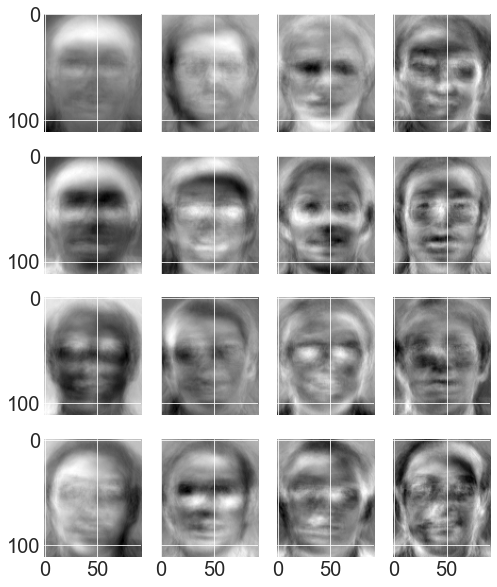

In [256]:
n_components = 20
eigenfaces = pca.components_[:n_components]
 
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()